In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X_mnist = pd.DataFrame(mnist["data"])
y = pd.DataFrame(mnist["target"])

X_mnist = X_mnist.sample(n=2000)
y_mnist = y.loc[X_mnist.index]

X = PCA(n_components=30).fit_transform(X_mnist)

/home/nilabha/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
import tsne

X = np.array(X)

p_ij = tsne.get_original_pairwise_affinities(X)

Computing Pairwise Affinities....
Completed Pairwise Affinities Matrix. 



In [4]:
p_ij_symmetric = tsne.get_symmetric_p_ij(p_ij)

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 



In [5]:
y0 = tsne.initialization(X,2,'random')

In [6]:
q_ij = tsne.get_low_dimensional_affinities(y0)

In [7]:
gradient = tsne.get_gradient(p_ij_symmetric,q_ij,y0)

In [8]:
solution, Y = tsne.tsne(X, perplexity = 50, T = 1000, η = 200, early_exaggeration = 4, n_dimensions = 2)

Computing Pairwise Affinities....
Completed Pairwise Affinities Matrix. 

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 

Optimizing Low Dimensional Embedding....
Iteration 1: Value of Cost Function is 3.5620855610416475
Iteration 50: Value of Cost Function is 2.7977149895910647
Iteration 100: Value of Cost Function is 2.4225792740955066
Iteration 150: Value of Cost Function is 2.3798637993096086
Iteration 200: Value of Cost Function is 2.362250924953514
Iteration 250: Value of Cost Function is 2.3588850021153127
Iteration 300: Value of Cost Function is 1.334258595577983
Iteration 350: Value of Cost Function is 1.2478468884162746
Iteration 400: Value of Cost Function is 1.219517656379989
Iteration 450: Value of Cost Function is 1.2065242147889828
Iteration 500: Value of Cost Function is 1.1993341463177383
Iteration 550: Value of Cost Function is 1.1951509023130893
Iteration 600: Value of Cost Function is 1.1924474754878385
Iteration 650: Value of Cost Function is

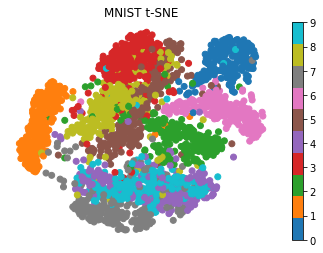

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g1 = ax.scatter(solution[:, 0], solution[:, 1], c=y_mnist, cmap="tab10")
ax.axis('off')
ax.set_title('MNIST t-SNE')
plt.colorbar(g1,ax=ax)
plt.savefig("plots/t-SNE.png")
plt.show()

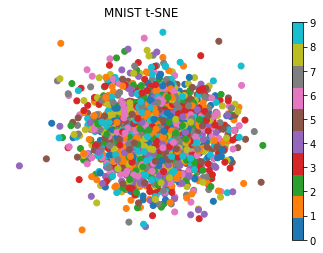

In [10]:
from matplotlib import animation

fig, ax = plt.subplots()
ax.axis('off')
ax.set_title('MNIST t-SNE')
scat = ax.scatter(Y[1][:, 0], Y[1][:, 1], c=y_mnist, cmap="tab10")
plt.colorbar(scat,ax=ax)
plt.show()

# t-SNE Descent Animation
ys = []
prelims = list(range(0,50,5))
early_range = list(range(50,250,10))
mid_range_1 = list(range(250,300,5))
mid_range_2 = list(range(300,400,10))
end_range = list(range(400,1000,50))

visual_range = prelims + early_range + mid_range_1 + mid_range_2 + end_range + [999,999,999,999,999,999,999]

for i in visual_range:
    ys.append(Y[i])

def strike(text):
    result = ''
    for c in text:
        result = result + c + '\u0336'
    return result

def animate(iterations):
    scat.set_offsets(ys[iterations])
    if iterations < 31:
        ax.text(0.05, 1, 'Early Exaggeration',
            horizontalalignment='center',
            verticalalignment='center',
            transform = ax.transAxes)
    else:
        ax.text(0.05, 1, strike('                  '),
            horizontalalignment='center',
            verticalalignment='center',
            transform = ax.transAxes)
        
    ax.set_xlim([1.25*np.min(ys[iterations][:, 0]),1.25*np.max(ys[iterations][:, 0])])
    ax.set_ylim([1.25*np.min(ys[iterations][:, 1]),1.25*np.max(ys[iterations][:, 1])])


rot_animation = animation.FuncAnimation(fig, animate, frames=len(ys)-1, interval=350, blit=False)

rot_animation.save('plots/MNIST.gif',dpi=250)